In [ ]:
#k means cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Clustering (Manhattan) from Scratch/account_exist_2.csv')
data.head()

,flipkart,amazon,snapdeal,myntra,indiamart,housing,zoomcar,facebook,instagram,microsoft,...,monster,naukri,spicejet,mmt,yatra,toi,indianexpress,spotify,digilocker,adobe
0,True,NaN,NaN,NaN,NaN,False,NaN,True,NaN,False,...,False,NaN,NaN,False,False,NaN,False,NaN,NaN,NaN
1,True,True,NaN,NaN,NaN,False,NaN,NaN,False,False,...,False,NaN,False,NaN,True,NaN,False,NaN,NaN,NaN
2,NaN,True,False,NaN,NaN,NaN,NaN,True,True,True,...,False,NaN,False,False,False,True,False,NaN,NaN,NaN
3,True,False,False,NaN,NaN,False,NaN,True,True,False,...,False,NaN,False,False,False,False,False,NaN,NaN,NaN
4,True,True,NaN,NaN,NaN,NaN,NaN,True,False,True,...,False,NaN,False,False,False,True,False,NaN,NaN,NaN


In [ ]:
datafinal = data.loc[:,~data.columns.isin(['myntra','indiamart','zoomcar','twitter','linkedin','whatsapp','pinterest','discord','Phonepe','naukri',
                                  'spotify','digilocker','adobe'])]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Clustering (Manhattan) from Scratch/transformed_account_exist_2.csv')
df.head()

,flipkart,amazon,snapdeal,myntra,indiamart,housing,zoomcar,facebook,instagram,microsoft,...,monster,naukri,spicejet,mmt,yatra,toi,indianexpress,spotify,digilocker,adobe
0,0.3176,0.1376,0.0772,0.4908,0.4908,0.4002,0.4908,0.1697,0.1160,0.2546,...,0.383,0.4908,0.0909,0.3744,0.4038,0.0824,0.411,0.4908,0.4908,0.4908
1,0.3176,0.2476,0.0772,0.4908,0.4908,0.4002,0.4908,0.2671,0.0824,0.2546,...,0.383,0.4908,0.3991,0.0930,0.0071,0.0824,0.411,0.4908,0.4908,0.4908
2,0.1055,0.2476,0.3260,0.4908,0.4908,0.0824,0.4908,0.1697,0.2924,0.0817,...,0.383,0.4908,0.3991,0.3744,0.4038,0.1023,0.411,0.4908,0.4908,0.4908
3,0.3176,0.1056,0.3260,0.4908,0.4908,0.4002,0.4908,0.1697,0.2924,0.2546,...,0.383,0.4908,0.3991,0.3744,0.4038,0.3061,0.411,0.4908,0.4908,0.4908
4,0.3176,0.2476,0.0772,0.4908,0.4908,0.0824,0.4908,0.1697,0.0824,0.0817,...,0.383,0.4908,0.3991,0.3744,0.4038,0.1023,0.411,0.4908,0.4908,0.4908


In [ ]:
df.nunique()

flipkart         3
amazon           3
snapdeal         3
myntra           1
indiamart        1
housing          3
zoomcar          1
facebook         3
instagram        3
microsoft        3
twitter          1
skype            3
telegram         3
linkedin         1
google           3
whatsapp         1
snapchat         3
pinterest        1
discord          1
phonepe          1
jeevansathi      3
shaadi           3
monster          3
naukri           1
spicejet         3
mmt              3
yatra            3
toi              3
indianexpress    3
spotify          1
digilocker       1
adobe            1
dtype: int64

In [ ]:
df = df.loc[:,~df.columns.isin(['myntra','indiamart','zoomcar','twitter','linkedin','whatsapp','pinterest','discord','Phonepe','naukri',
                                  'spotify','digilocker','adobe'])]

In [ ]:
X = df.iloc[:,:].values

In [ ]:
class KMeans:
  def __init__(self,n_clusters=2,max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self,X):

    random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centroids = X[random_index]

    for i in range(self.max_iter):

      # assign clusters
      cluster_group,wcss = self.assign_clusters(X)
      old_centroids = self.centroids

      # move centroids
      self.centroids = self.move_centroids(X,cluster_group)

      # check finish
      if (np.array(old_centroids==self.centroids)).all():
        break

    return cluster_group,wcss

  def assign_clusters(self,X):
    cluster_group = []
    # distances = []
    wcss = 0

    for row in X:
      distances = []
      for centroid in self.centroids:
        distances.append(np.dot(abs(row-centroid),1).sum())
      min_distance = min(distances)
      wcss += (min_distance)**2
      index_pos=distances.index(min_distance)
      cluster_group.append(index_pos)

    return np.array(cluster_group),wcss

  def move_centroids(self,X,cluster_group):

    new_centroids = []
    cluster_type = np.unique(cluster_group)

    for type in cluster_type:
      new_centroids.append(X[cluster_group == type].mean(axis=0))
    return np.array(new_centroids) 

  def _inertia(self,X,n_clusters=2):

    km = KMeans(self.n_clusters,self.max_iter)
    _,dist_sqr = km.fit_predict(X)

    return dist_sqr

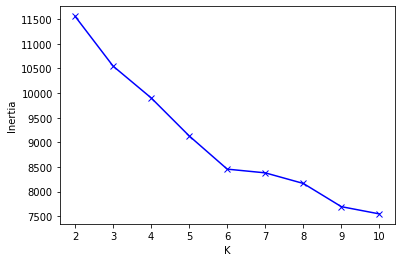

In [ ]:
#elbow_test
inertia = []
K = 10
n = range(2,K+1)

for k in n:
    km = KMeans(n_clusters=k)
    inertia.append(km._inertia(X,k))

#plotting elbow graph
plt.plot(n, inertia, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [ ]:
model = KMeans(n_clusters=6)
labels,_ = model.fit_predict(X) #prediction gives labels and inertia at that number of clusters
labels = pd.DataFrame(labels)

In [ ]:
output = pd.concat((labels,data),axis=1)
output = output.rename({0:'labels'},axis=1)
output.head()

,labels,flipkart,amazon,snapdeal,myntra,indiamart,housing,zoomcar,facebook,instagram,...,monster,naukri,spicejet,mmt,yatra,toi,indianexpress,spotify,digilocker,adobe
0,2,True,NaN,NaN,NaN,NaN,False,NaN,True,NaN,...,False,NaN,NaN,False,False,NaN,False,NaN,NaN,NaN
1,2,True,True,NaN,NaN,NaN,False,NaN,NaN,False,...,False,NaN,False,NaN,True,NaN,False,NaN,NaN,NaN
2,5,NaN,True,False,NaN,NaN,NaN,NaN,True,True,...,False,NaN,False,False,False,True,False,NaN,NaN,NaN
3,1,True,False,False,NaN,NaN,False,NaN,True,True,...,False,NaN,False,False,False,False,False,NaN,NaN,NaN
4,0,True,True,NaN,NaN,NaN,NaN,NaN,True,False,...,False,NaN,False,False,False,True,False,NaN,NaN,NaN


In [ ]:
label0 = output.loc[output['labels']==0]
label1 = output.loc[output['labels']==1]
label2 = output.loc[output['labels']==2]
label3 = output.loc[output['labels']==3]
label4 = output.loc[output['labels']==4]
label5 = output.loc[output['labels']==5]

In [ ]:
print(label0.flipkart.value_counts())
print(label0.amazon.value_counts())
print(label0.snapdeal.value_counts())
print(label0.myntra.value_counts())
print(label0.indiamart.value_counts())

True     426
False     72
Name: flipkart, dtype: int64
True     354
False    112
Name: amazon, dtype: int64
False    364
True     169
Name: snapdeal, dtype: int64
Series([], Name: myntra, dtype: int64)
Series([], Name: indiamart, dtype: int64)
